In [22]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
# Using yfinance to extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [24]:
import requests
from bs4 import BeautifulSoup

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Find the table with Tesla Revenue data
table = soup.find("table")

# Extract data from the table and create a DataFrame
tesla_revenue_data = []
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    date = cols[0].text
    revenue = cols[1].text.replace(",", "").replace("$", "")
    tesla_revenue_data.append({"Date": date, "Revenue": revenue})

tesla_revenue = pd.DataFrame(tesla_revenue_data)

# Drop any rows with missing or empty revenue data
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the last five rows of the tesla_revenue DataFrame
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [25]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame named gme_data
gme_data = gme.history(period="max")

# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [26]:
# Use the requests library to download the webpage containing the GameStop revenue data
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_gme_revenue = requests.get(url_gme_revenue)

# Save the text of the response as a variable named html_data
html_data_gme_revenue = response_gme_revenue.text

# Parse the html data using BeautifulSoup
soup_gme_revenue = BeautifulSoup(html_data_gme_revenue, "html.parser")

# Using BeautifulSoup, extract the table with GameStop Revenue and store it into a DataFrame named gme_revenue.
# The DataFrame should have columns Date and Revenue.

table_gme_revenue = soup_gme_revenue.find_all("table")[1]
rows_gme_revenue = table_gme_revenue.find_all("tr")
data_gme_revenue = []

for row in rows_gme_revenue:
    cols = row.find_all("td")
    cols = [elem.text.strip() for elem in cols]
    data_gme_revenue.append(cols)

gme_revenue = pd.DataFrame(data_gme_revenue[1:], columns=["Date", "Revenue"])

# Remove the comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "")

# Remove any null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display the last five rows of the gme_revenue DataFrame
gme_revenue.tail()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning:

The default value of regex will change from True to False in a future version.



,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


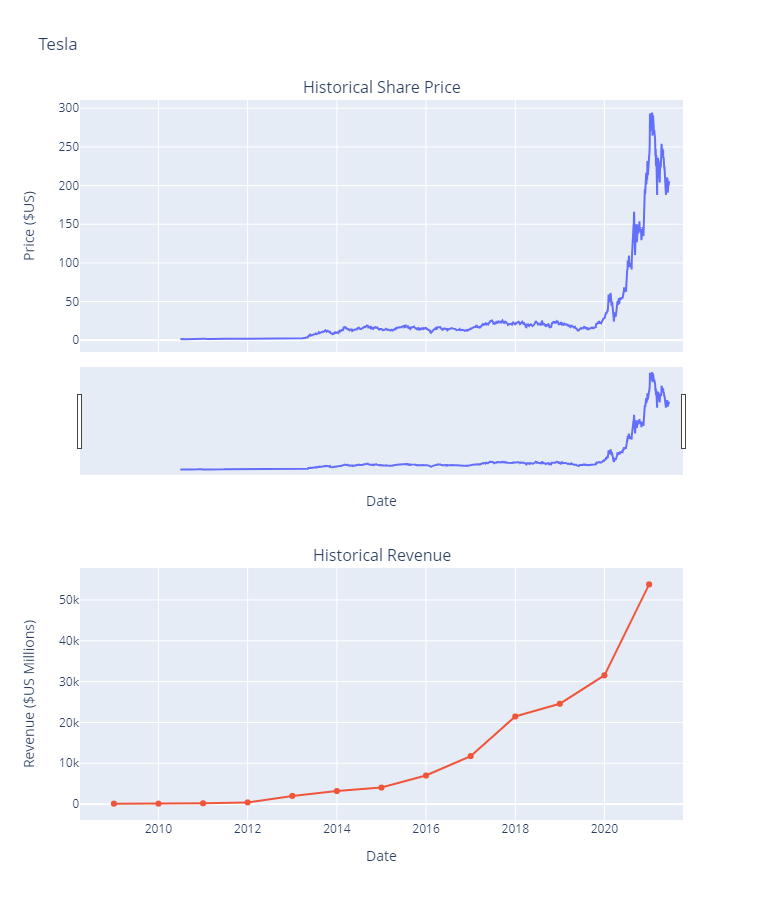

In [27]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()
# Use the make_graph function to graph the Tesla Stock Data
make_graph(tesla_data, tesla_revenue, 'Tesla')

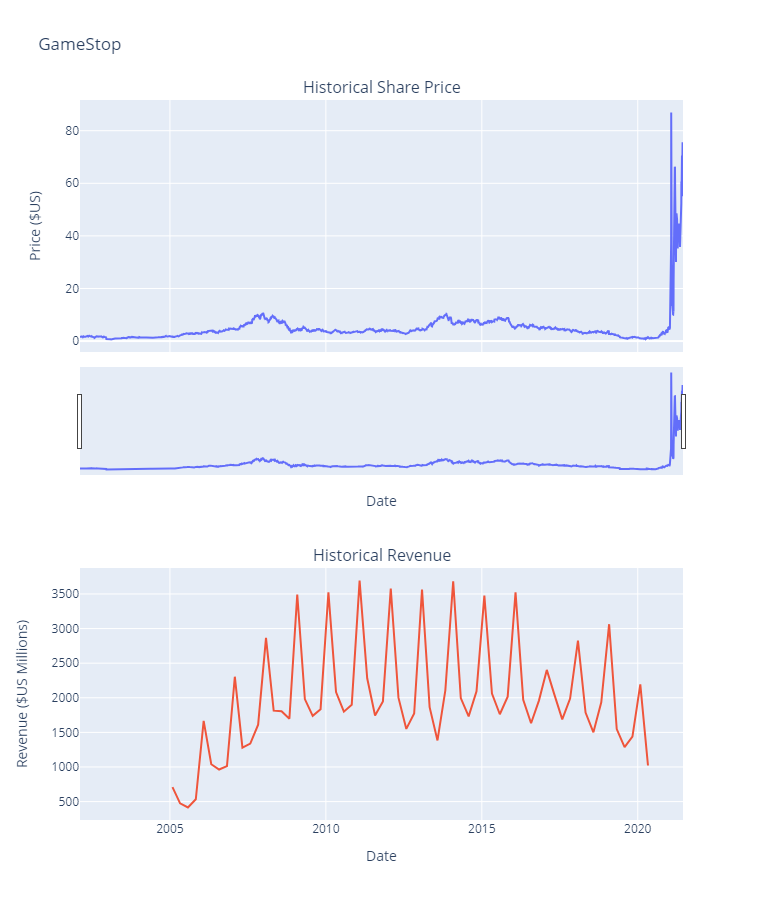

In [28]:
# Use the make_graph function to graph the GameStop Stock Data
make_graph(gme_data, gme_revenue, 'GameStop')